In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

In [21]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(len(values))

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

# Combine output currents
average_outputs("radius_corr/data/r_5", 10 , 10)
average_outputs("radius_corr/data/r_20", 10 , 10)
average_outputs("radius_corr/data/r_40", 10 , 10)
average_outputs("resistance_corr/data/R_50", 10 , 10)
average_outputs("resistance_corr/data/R_100", 10 , 10)
average_outputs("resistance_corr/data/R_200", 10 , 10)
average_outputs("resistance_corr/data/R_400", 10 , 10)
average_outputs("resistance_corr/data/R_800", 10 , 10)
average_outputs("../step_input/1I_1O/data/", 10, 10)

# Combine states
average_states("radius_corr/data/r_5", 10 , 10)
average_states("radius_corr/data/r_20", 10 , 10)
average_states("radius_corr/data/r_40", 10 , 10)
average_states("resistance_corr/data/R_50", 10 , 10)
average_states("resistance_corr/data/R_100", 10 , 10)
average_states("resistance_corr/data/R_200", 10 , 10)
average_states("resistance_corr/data/R_400", 10 , 10)
average_states("resistance_corr/data/R_800", 10 , 10)
average_states("../step_input/1I_1O/data/", 10 , 10)

In [2]:
results         = pd.DataFrame()
results["t"]    = np.loadtxt("radius_corr/time.csv")[1:]*10**9
results['U']    = np.loadtxt("radius_corr/volt.csv")[1:,0]

results["I"]        = pd.read_csv("../step_input/1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["uI"]       = pd.read_csv("../step_input/1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["r_5_I"]    = pd.read_csv("radius_corr/data/r_5/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["r_5_uI"]   = pd.read_csv("radius_corr/data/r_5/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["r_20_I"]   = pd.read_csv("radius_corr/data/r_20/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["r_20_uI"]  = pd.read_csv("radius_corr/data/r_20/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["r_40_I"]   = pd.read_csv("radius_corr/data/r_40/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["r_40_uI"]  = pd.read_csv("radius_corr/data/r_40/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_50_I"]   = pd.read_csv("resistance_corr/data/R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_50_uI"]  = pd.read_csv("resistance_corr/data/R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_100_I"]  = pd.read_csv("resistance_corr/data/R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_100_uI"] = pd.read_csv("resistance_corr/data/R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_200_I"]  = pd.read_csv("resistance_corr/data/R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_200_uI"] = pd.read_csv("resistance_corr/data/R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_400_I"]  = pd.read_csv("resistance_corr/data/R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_400_uI"] = pd.read_csv("resistance_corr/data/R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_800_I"]  = pd.read_csv("resistance_corr/data/R_800/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_800_uI"] = pd.read_csv("resistance_corr/data/R_800/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results

,t,U,I,uI,r_5_I,r_5_uI,r_20_I,r_20_uI,r_40_I,r_40_uI,R_50_I,R_50_uI,R_100_I,R_100_uI,R_200_I,R_200_uI,R_400_I,R_400_uI,R_800_I,R_800_uI
0,0.1,0.1,900.0,286.181760,1900.0,392.300905,700.0,255.147016,1500.0,357.071421,1000.0,300.000000,1000.0,300.000000,800.0,271.293199,1100.0,312.889757,1300.0,336.303434
1,0.2,0.1,900.0,286.181760,800.0,271.293199,1600.0,366.606056,1400.0,346.987031,1500.0,357.071421,900.0,286.181760,1000.0,300.000000,700.0,255.147016,800.0,271.293199
2,0.3,0.1,1100.0,312.889757,1000.0,300.000000,700.0,255.147016,1200.0,324.961536,300.0,170.587221,400.0,195.959179,600.0,237.486842,900.0,286.181760,1400.0,346.987031
3,0.4,0.1,500.0,217.944947,1200.0,324.961536,900.0,286.181760,1500.0,357.071421,900.0,286.181760,600.0,237.486842,700.0,255.147016,700.0,255.147016,300.0,170.587221
4,0.5,0.1,1400.0,346.987031,600.0,237.486842,1700.0,375.632799,1300.0,336.303434,700.0,255.147016,400.0,195.959179,1200.0,324.961536,500.0,217.944947,1100.0,312.889757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,99.5,0.1,1500.0,384.057287,1000.0,300.000000,1100.0,312.889757,600.0,237.486842,400.0,195.959179,1400.0,346.987031,900.0,286.181760,500.0,217.944947,1300.0,336.303434
995,99.6,0.1,800.0,271.293199,900.0,286.181760,1700.0,375.632799,700.0,255.147016,1300.0,336.303434,800.0,271.293199,500.0,217.944947,1300.0,336.303434,700.0,255.147016
996,99.7,0.1,900.0,286.181760,700.0,255.147016,1000.0,300.000000,600.0,237.486842,900.0,286.181760,600.0,237.486842,800.0,271.293199,1000.0,300.000000,500.0,217.944947
997,99.8,0.1,1000.0,300.000000,800.0,271.293199,1600.0,366.606056,1500.0,357.071421,500.0,217.944947,800.0,271.293199,700.0,255.147016,800.0,271.293199,800.0,271.293199


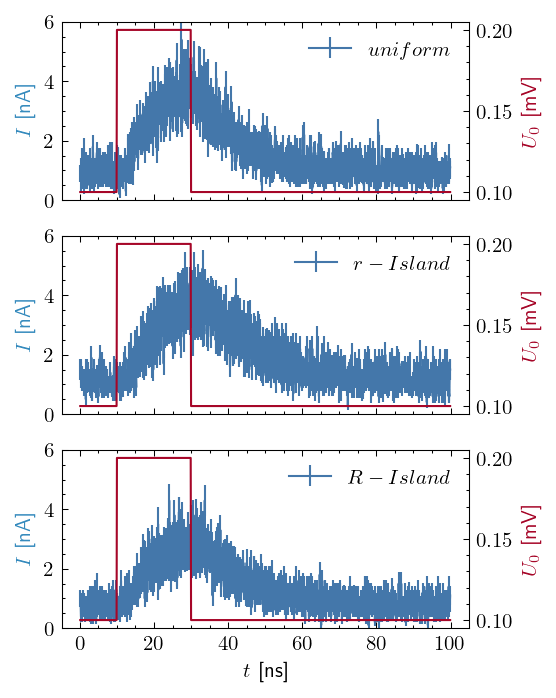

In [5]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*2)
    
    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='$uniform$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()
    ax.set_ylim(0,6)

    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_40_I']/1000, results['r_40_uI']/1000, label='$r-Island$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()
    ax.set_ylim(0,6)

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_100_I']/1000, results['R_100_uI']/1000, label='$R-Island$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xlabel("$t$ [ns]")
    ax.legend()
    ax.set_ylim(0,6)

    fig.savefig('plots/i_o_comp_R_and_r.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp_R_and_r.pdf', bbox_inches='tight', transparent=False)

MovieWriter ffmpeg unavailable; using Pillow instead.


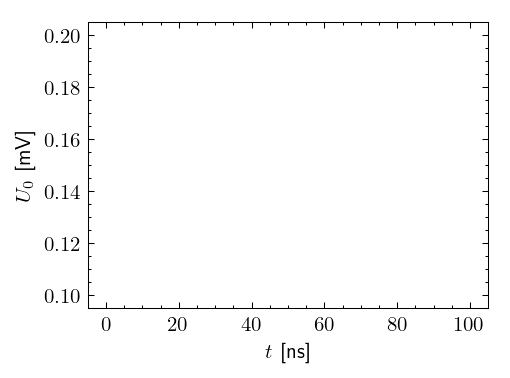

In [29]:
x   = results["t"].values
y   = results["U"].values

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    # line.axes.axis([xmin,xmax,ymin,ymax])
    
    return line,

with plt.style.context(["science","bright"]):

    fig     = plt.figure(dpi=150)
    fig.set_tight_layout(True)
    ax      = fig.add_subplot()
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U_0$ [mV]")
    
    line,   = ax.plot(x, y, lw=3)
    ani     = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line], interval=50, repeat_delay=500)

ani.save("plots/input.gif")

In [3]:
dic = {
    "standard"  : pd.read_csv("../step_input/1I_1O/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_5"       : pd.read_csv("radius_corr/data/r_5/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_20"      : pd.read_csv("radius_corr/data/r_20/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_40"      : pd.read_csv("radius_corr/data/r_40/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_50"      : pd.read_csv("resistance_corr/data/R_50/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_100"     : pd.read_csv("resistance_corr/data/R_100/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_200"     : pd.read_csv("resistance_corr/data/R_200/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_400"     : pd.read_csv("resistance_corr/data/R_400/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_800"     : pd.read_csv("resistance_corr/data/R_800/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


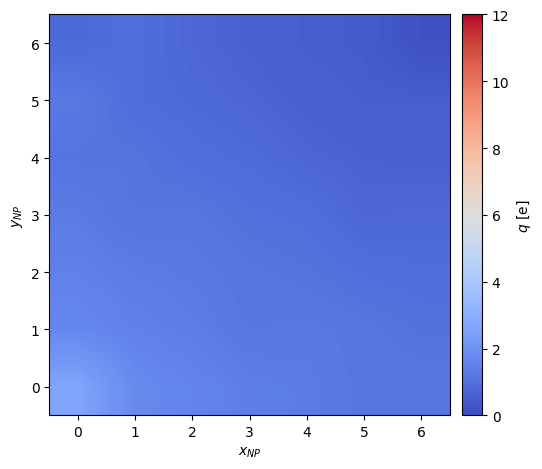

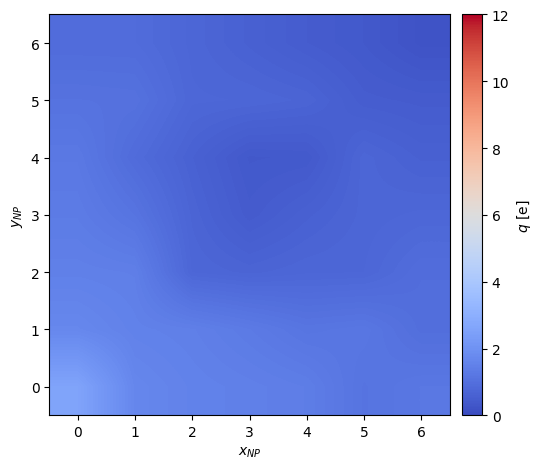

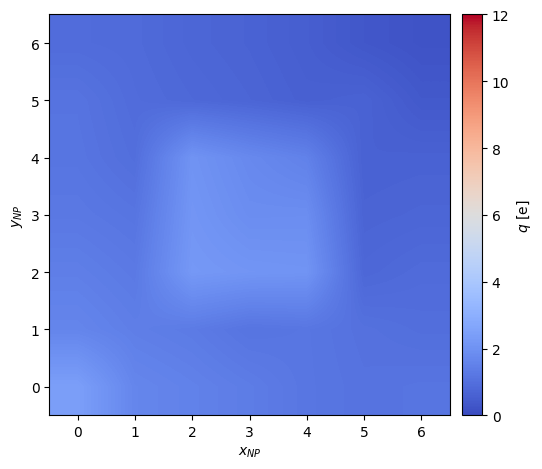

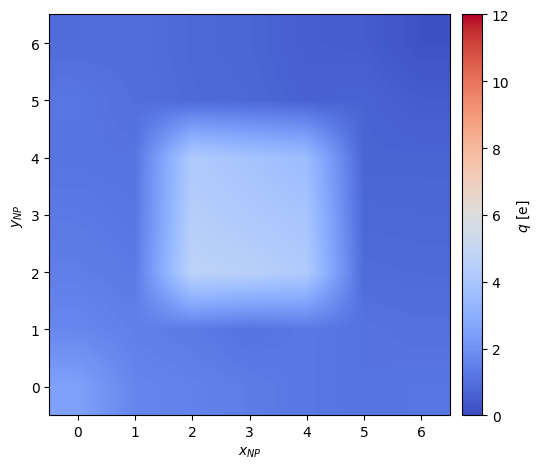

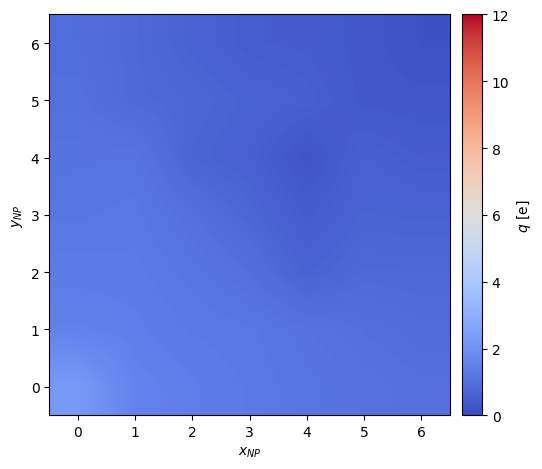

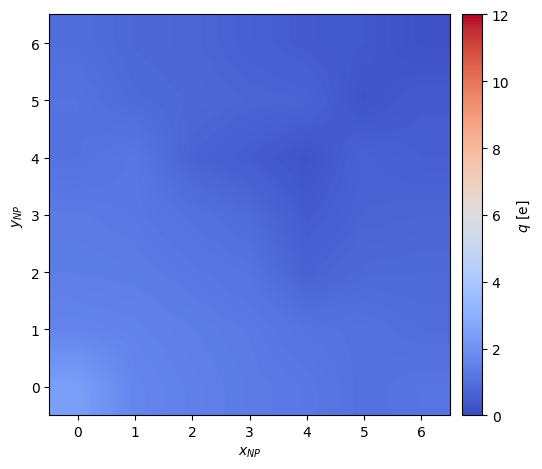

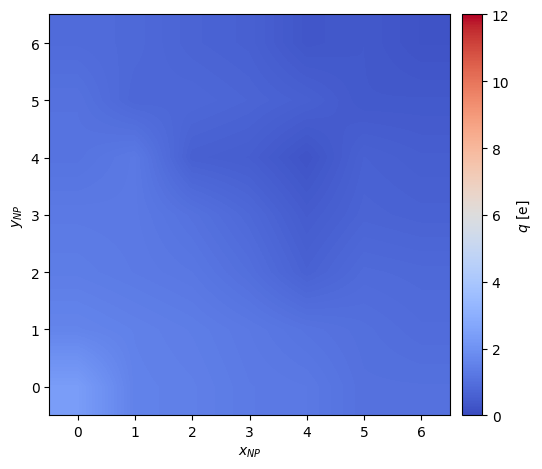

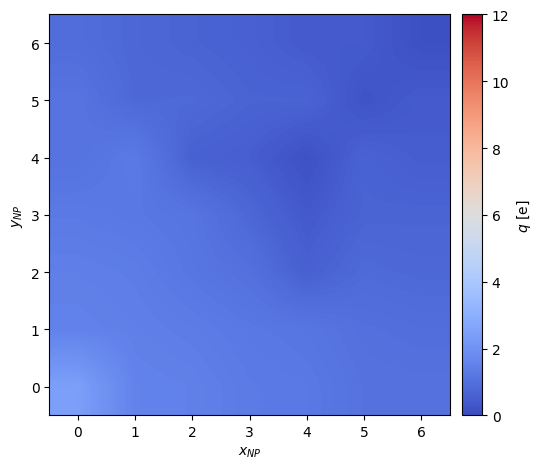

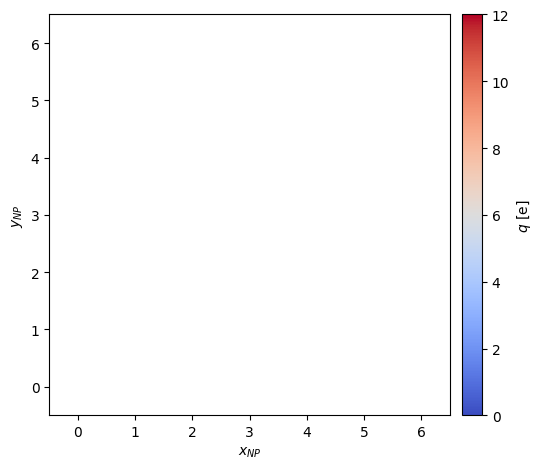

In [14]:
for key, val in dic.items():

    ani = nanonets_utils.animate_landscape(val.values, 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                           cbar_label='$q$ [e]', vmin=0, vmax=12)
    ani.save(f"plots/animations/state_animation_{key}.gif")

In [15]:
def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


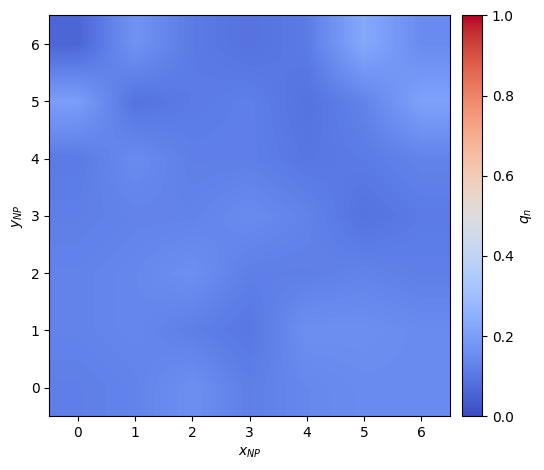

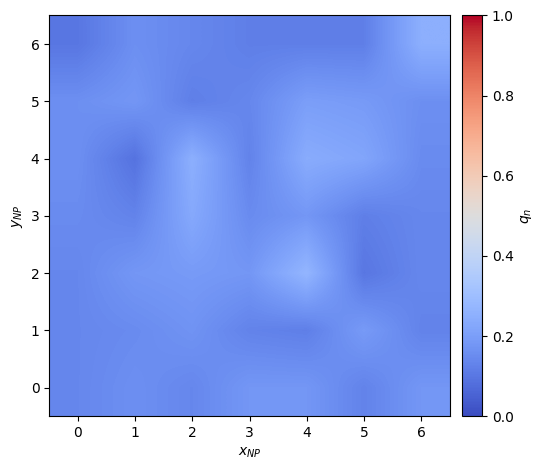

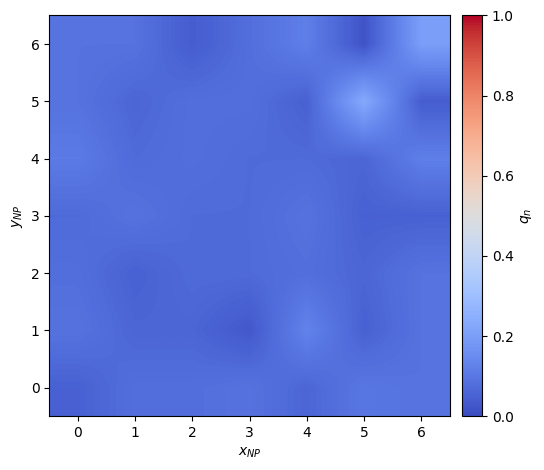

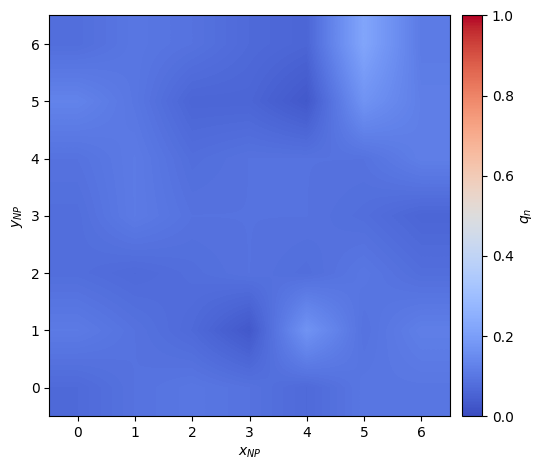

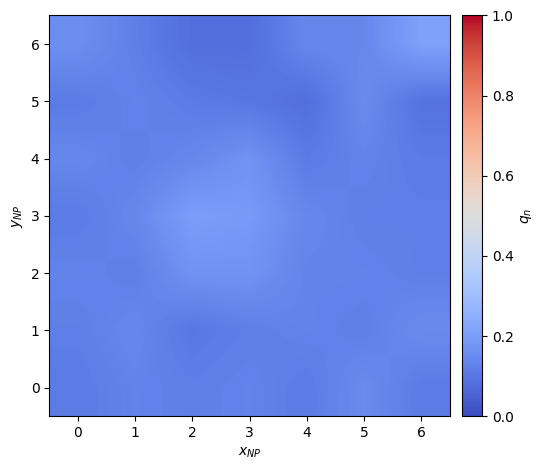

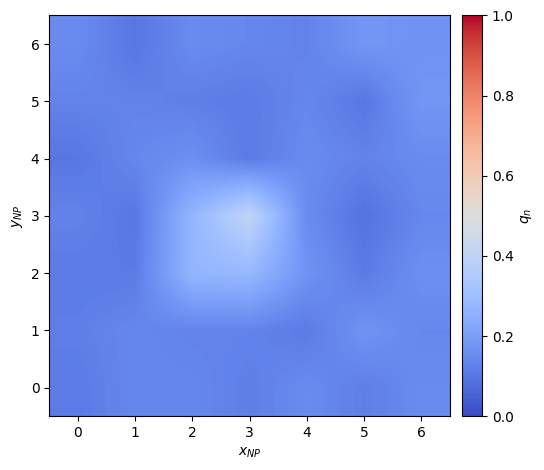

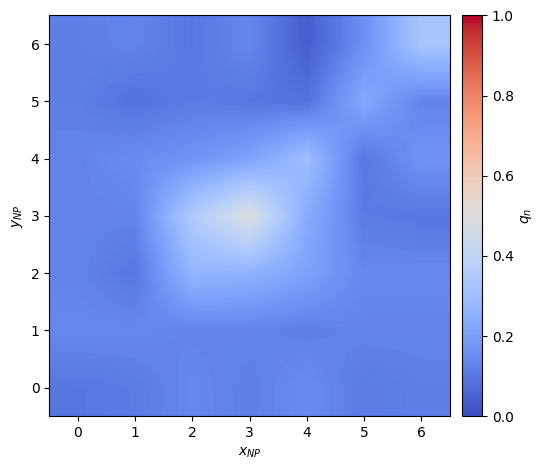

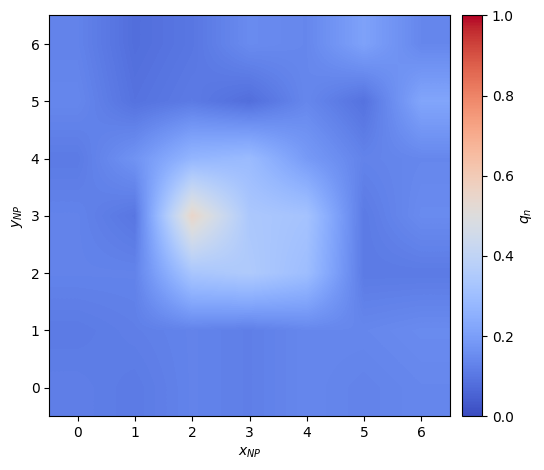

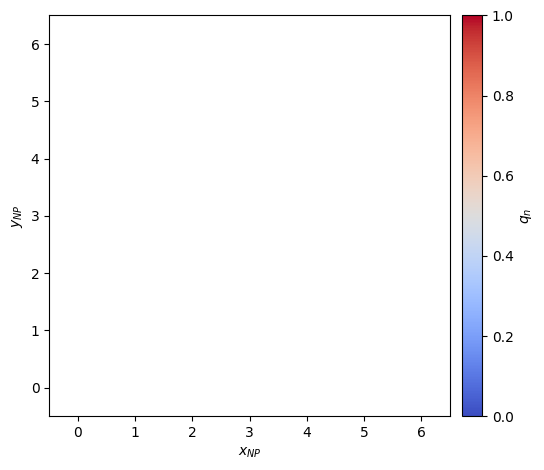

In [16]:
for key, val in dic.items():

    ani = nanonets_utils.animate_landscape(scale_landscape(val.values), 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                           cbar_label='$q_n$', vmin=0, vmax=1)
    ani.save(f"plots/animations/state_animation_scaled_{key}.gif")

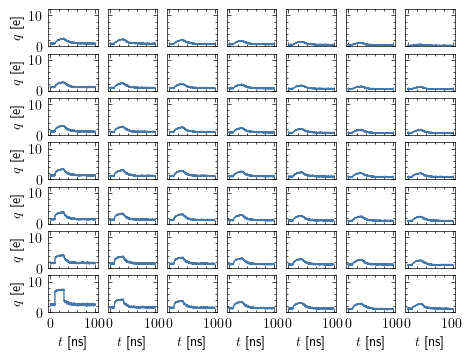

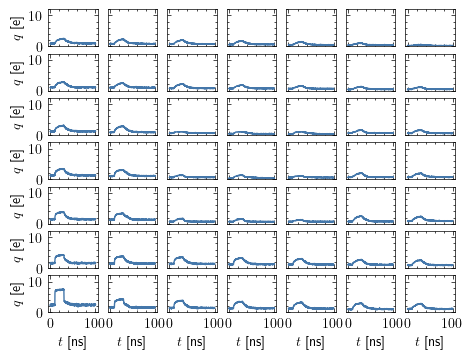

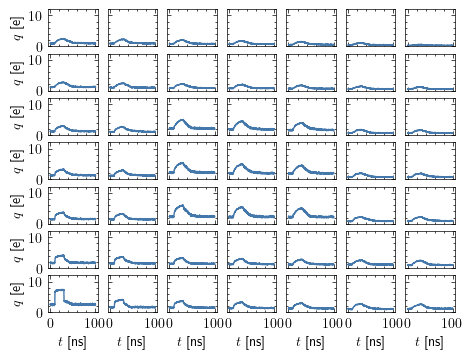

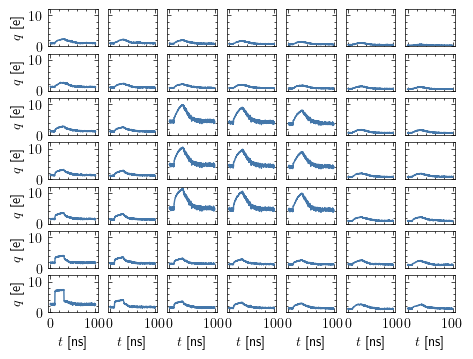

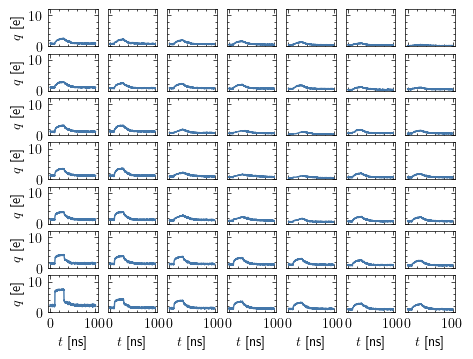

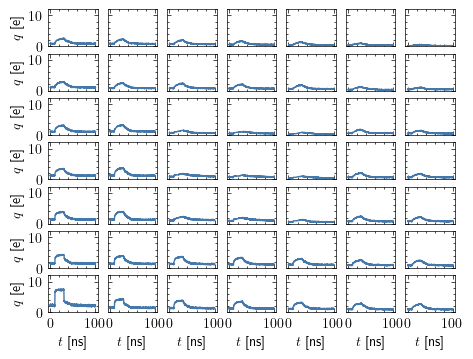

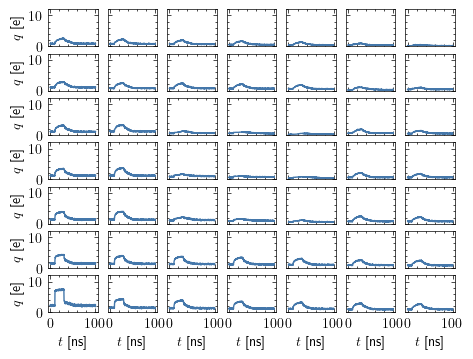

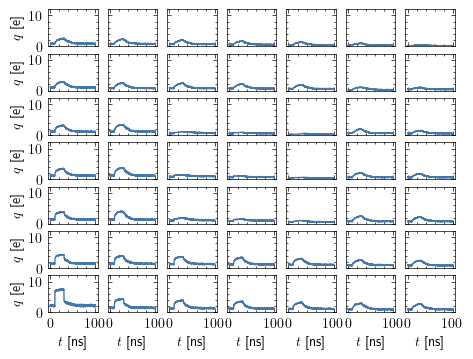

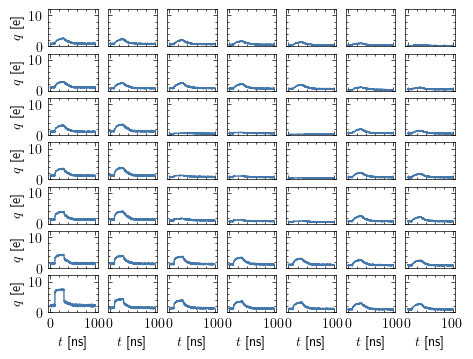

In [20]:
with plt.style.context(["science","bright"]):

    for key in dic.keys():

        fig, axs = plt.subplots(ncols=7, nrows=7)
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1.5)

        i = 0

        for row in np.arange(6,-1,-1):
            for col in range(0,7):

                axs[row,col].plot(results["t"], dic[key][f"{i}"].values)
                axs[row,col].set_ylim(0,12)

                if i >= 7:
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel("$t$ [ns]")

                if i % 7 != 0:
                    axs[row,col].set_yticklabels("")
                else:
                    axs[row,col].set_ylabel("$q$ [e]")

                i += 1

        fig.savefig(f'plots/state_vs_time/{key}.svg', bbox_inches='tight', transparent=True)
        fig.savefig(f'plots/state_vs_time/{key}.pdf', bbox_inches='tight', transparent=False)

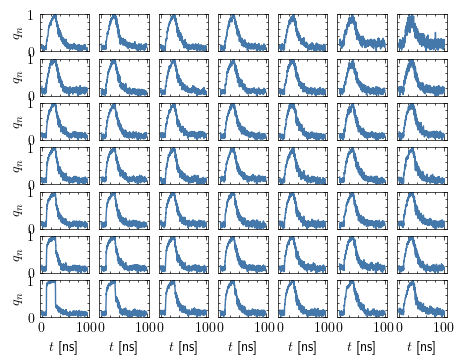

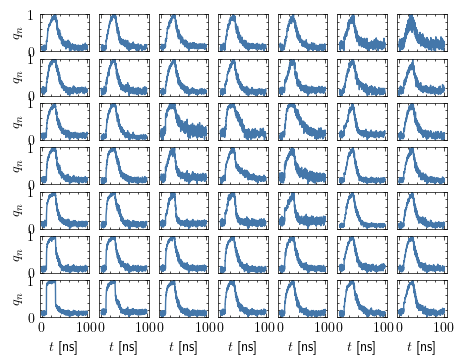

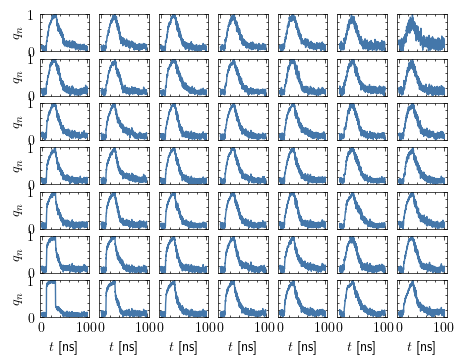

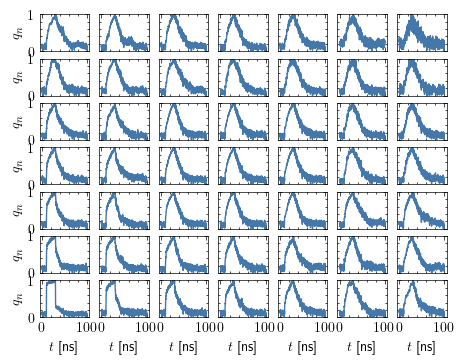

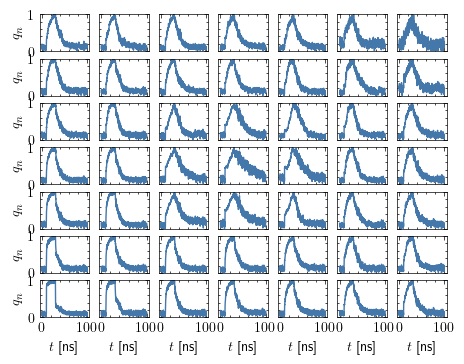

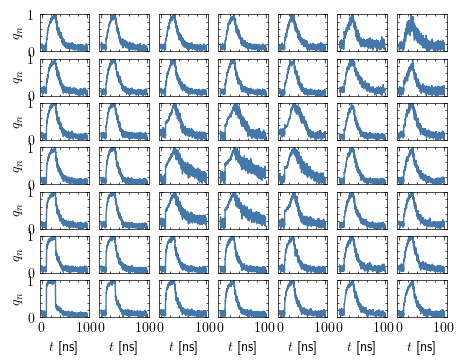

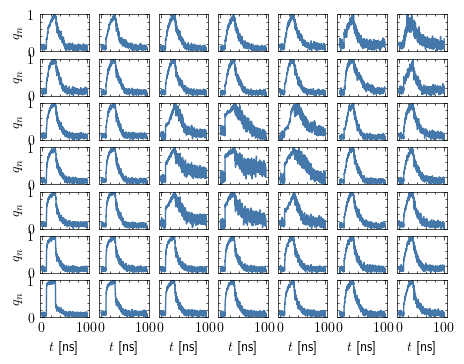

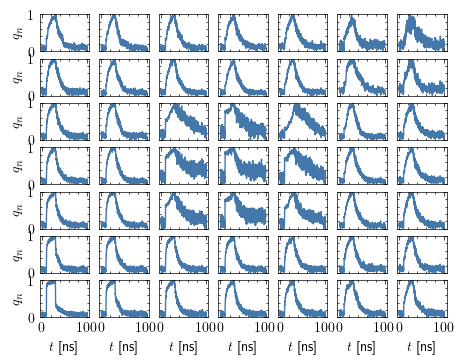

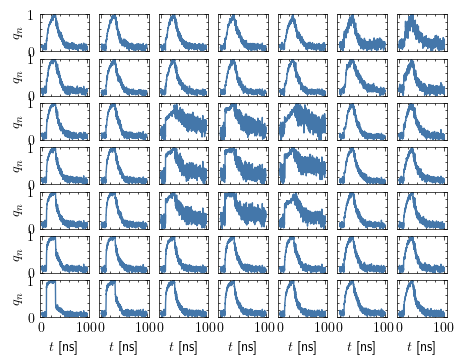

In [19]:
with plt.style.context(["science","bright"]):

    for key in dic.keys():

        fig, axs = plt.subplots(ncols=7, nrows=7)
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1.5)

        i = 0

        for row in np.arange(6,-1,-1):
            for col in range(0,7):

                axs[row,col].plot(results["t"], scale_landscape(dic[key][f"{i}"]).values)
                axs[row,col].set_ylim(0,1)

                if i >= 7:
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel("$t$ [ns]")

                if i % 7 != 0:
                    axs[row,col].set_yticklabels("")
                else:
                    axs[row,col].set_ylabel("$q_n$")

                i += 1

        fig.savefig(f'plots/state_vs_time/scaled_{key}.svg', bbox_inches='tight', transparent=True)
        fig.savefig(f'plots/state_vs_time/scaled_{key}.pdf', bbox_inches='tight', transparent=False)

In [21]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

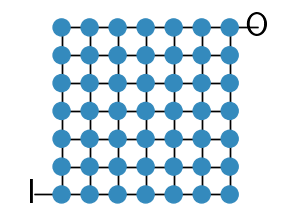

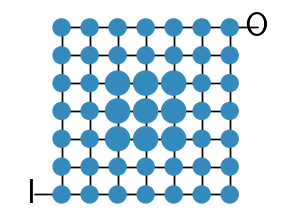

In [22]:
node_size = 150

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size = np.repeat(150, 51)

for i in [16,17,18,23,24,25,30,31,32]:
    node_size[i] = 300

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot_island.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot_island.pdf', bbox_inches='tight', transparent=False)

In [24]:
def autocorrelation(x : np.array, y : np.array, lags : int):

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

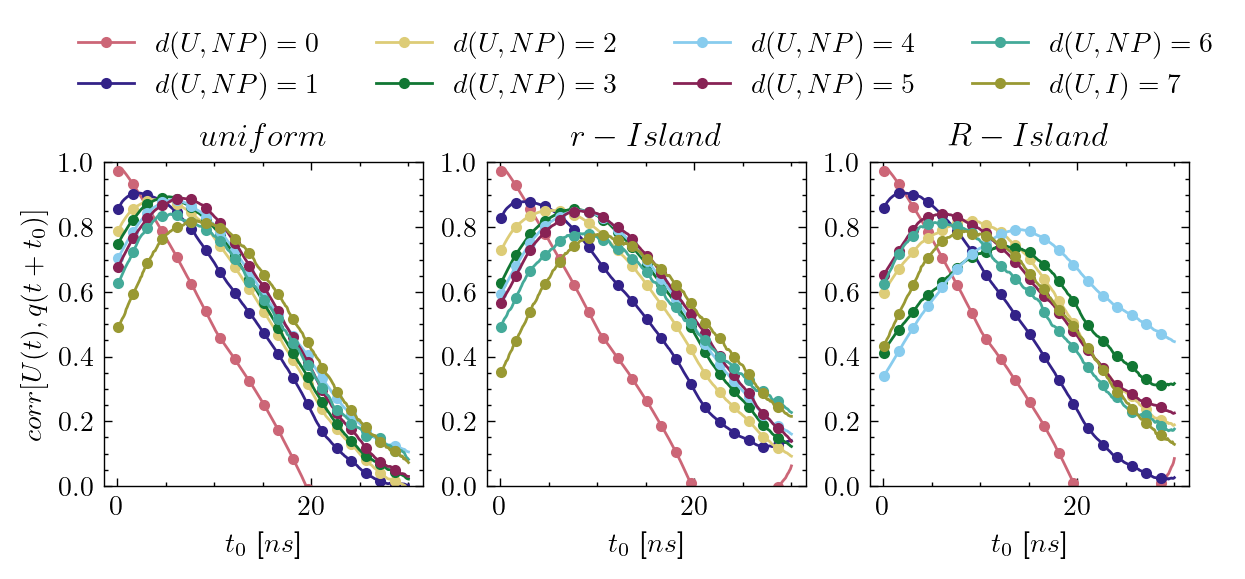

In [77]:
np_index    = [0,8,16,24,32,40,48]
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

with plt.style.context(["science","muted"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*0.8)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    for j, i in enumerate(np_index):

        ax1.plot(t[:n_lags], autocorrelation(x,dic["standard"][f"{i}"].values,n_lags), '.-', markevery=15)
        ax2.plot(t[:n_lags], autocorrelation(x,dic["r_40"][f"{i}"].values,n_lags), '.-', markevery=15, label=f"$d(U,NP) = {j}$")
        ax3.plot(t[:n_lags], autocorrelation(x,dic["R_100"][f"{i}"].values,n_lags), '.-', markevery=15)

    ax1.plot(t[:n_lags], autocorrelation(x,results["I"],n_lags), '.-', markevery=15)
    ax2.plot(t[:n_lags], autocorrelation(x,results["r_40_I"],n_lags), '.-', markevery=15, label=f"$d(U,I) = 7$")
    ax3.plot(t[:n_lags], autocorrelation(x,results["R_100_I"],n_lags), '.-', markevery=15)

    ax1.set_ylabel("$corr[U(t),q(t+t_0)]$")
    ax1.set_xlabel("$t_0$ [$ns$]")
    ax2.set_xlabel("$t_0$ [$ns$]")
    ax3.set_xlabel("$t_0$ [$ns$]")

    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_ylim(0,1)

    ax1.set_title("$uniform$")
    ax2.set_title("$r-Island$")
    ax3.set_title("$R-Island$")

    ax2.legend(ncol=4, bbox_to_anchor=(0.5,1.30), loc='center')

    fig.savefig('plots/state_vs_input_corr.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr.pdf', bbox_inches='tight', transparent=False)

In [34]:
np_index    = [0,8,16,24,32,40,48]
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

auto_vals   = []

for key, val in dic.items():
    np_vals = []
    for j, i in enumerate(np_index): 
        np_vals.append(np.round(t[np.argmax(autocorrelation(x,val[f"{i}"].values,n_lags))],2))
    auto_vals.append(np_vals)

In [44]:
dic.keys()

dict_keys(['standard', 'r_5', 'r_20', 'r_40', 'R_50', 'R_100', 'R_200', 'R_400', 'R_800'])

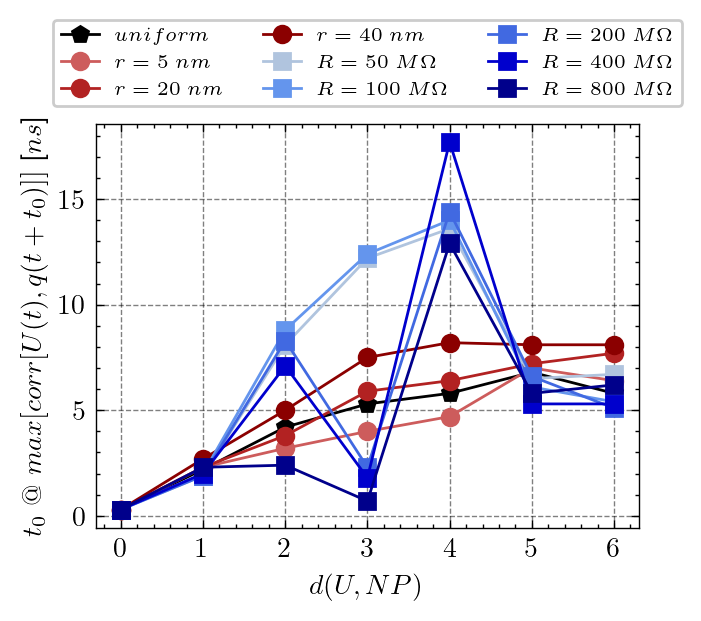

In [75]:
labels  = ['$uniform$', '$r = 5$ $nm$', '$r = 20$ $nm$', '$r = 40$ $nm$', '$R = 50$ $M\Omega$', '$R = 100$ $M\Omega$', '$R = 200$ $M\Omega$', '$R = 400$ $M\Omega$', '$R = 800$ $M\Omega$']
colors  = ['black','indianred','firebrick', 'darkred', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'darkblue']
markers = ['p','o','o','o','s','s','s','s','s']
# ls      = ['solid','dashed','dashed','dashed','dotted','dotted','dotted','dotted','dotted']

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, vals in enumerate(auto_vals):

        ax.plot(np.arange(len(vals)), vals, label=labels[i], c=colors[i], marker=markers[i])   

    ax.set_ylabel("$t_0$ $@$ $max[corr[U(t),q(t+t_0)]]$ [$ns$]") 
    ax.set_xlabel("$d(U,NP)$")
    ax.set_xticks(np.arange(len(vals)))
    ax.legend(ncol=3, fontsize='x-small', loc='center', bbox_to_anchor=(0.5,1.15))
    
    fig.savefig('plots/state_vs_input_corr_max.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_max.pdf', bbox_inches='tight', transparent=False)

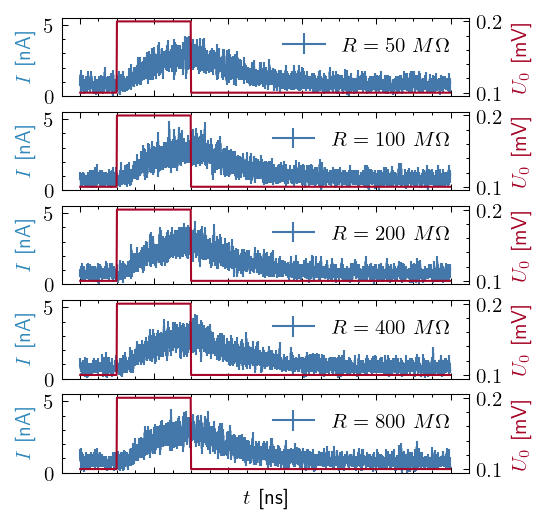

In [65]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*1.5)
    
    ax  = fig.add_subplot(5,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_50_I']/1000, results['R_50_uI']/1000, label='$R = 50$ $M\Omega$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(5,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_100_I']/1000, results['R_100_uI']/1000, label='$R = 100$ $M\Omega$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(5,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_200_I']/1000, results['R_200_uI']/1000, label='$R = 200$ $M\Omega$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xticklabels("")
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(5,1,4)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_400_I']/1000, results['R_400_uI']/1000, label='$R = 400$ $M\Omega$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xticklabels("")
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(5,1,5)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_800_I']/1000, results['R_800_uI']/1000, label='$R = 800$ $M\Omega$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xlabel("$t$ [ns]")
    ax.set_xticklabels("")
    ax.set_ylim(0,5.5)
    ax.legend()

    fig.savefig('plots/i_o_comp_R.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp_R.pdf', bbox_inches='tight', transparent=False)

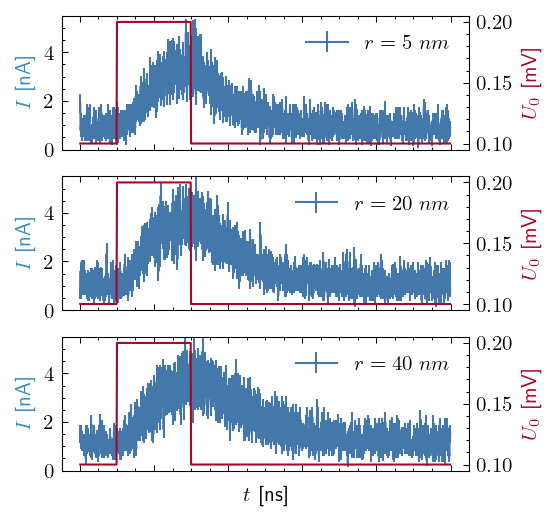

In [69]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*1.5)
    
    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_5_I']/1000, results['r_5_uI']/1000, label='$r = 5$ $nm$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_20_I']/1000, results['r_20_uI']/1000, label='$r = 20$ $nm$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,5.5)
    ax.legend()

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_40_I']/1000, results['r_40_uI']/1000, label='$r = 40$ $nm$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xticklabels("")
    ax.set_ylim(0,5.5)
    ax.legend()
    ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/i_o_comp_r.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp_r.pdf', bbox_inches='tight', transparent=False)